# Requirements

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **average sea-level pressure** in the city of Skopje. Your task involves employing bagging and boosting methods to forecast the average sea-level pressure. To accomplish this, you will use data from the preceding three days, consisting of average, minimal, and maximal temperatures, precipitation, as well as wind direction and speed, and the current season. By applying these ensemble learning techniques, you aim to enhance the accuracy and reliability of your predictions, gaining valuable insights into the temporal dynamics of sea-level pressure based on the given meteorological variables.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Weather Dataset

## Exploring the Weather Dataset
This dataset consists of daily weather records for the city of Skopje from January 1, 2021, to August 1, 2023. Each entry includes a unique station ID, city name, date, corresponding season (e.g., summer, winter), and various meteorological parameters such as average, minimum, and maximum temperatures in Celsius, precipitation in millimeters, average wind direction in degrees, average wind speed in kilometers per hour, and average sea-level pressure in hectopascals. The dataset offers comprehensive insights into the climatic conditions, allowing for analysis and exploration of weather patterns in Skopje over the specified time period.

The dataset comprises the following columns:
- station_id - unique ID for the weather station,
- city_name - name of the city where the station is located,
- date - date of the weather record,
- season - season corresponding to the date (e.g., summer, winter),
- avg_temp_c - average temperature in Celsius,
- min_temp_c - minimum temperature in Celsius,
- max_temp_c - maximum temperature in Celsius,
- precipitation_mm - precipitation in millimeters,
- avg_wind_dir_deg - average wind direction in degrees,
- avg_wind_speed_kmh - average wind speed in kilometers per hour, and
- avg_sea_level_pres_hpa - average sea-level pressure in hectopascals.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [2]:
data=pd.read_csv('weather.csv')

NameError: name 'pd' is not defined

In [30]:
data.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.5,13.2,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,-2.6,11.2,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,3.5,12.5,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,6.1,7.2,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,2.3,6.7,4.6,11.0,5.1,1014.5


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station_id              943 non-null    int64  
 1   date                    943 non-null    object 
 2   avg_temp_c              943 non-null    float64
 3   min_temp_c              943 non-null    float64
 4   max_temp_c              943 non-null    float64
 5   precipitation_mm        943 non-null    float64
 6   avg_wind_dir_deg        943 non-null    float64
 7   avg_wind_speed_kmh      943 non-null    float64
 8   avg_sea_level_pres_hpa  943 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 66.4+ KB


Explore the dataset using visualizations of your choice.

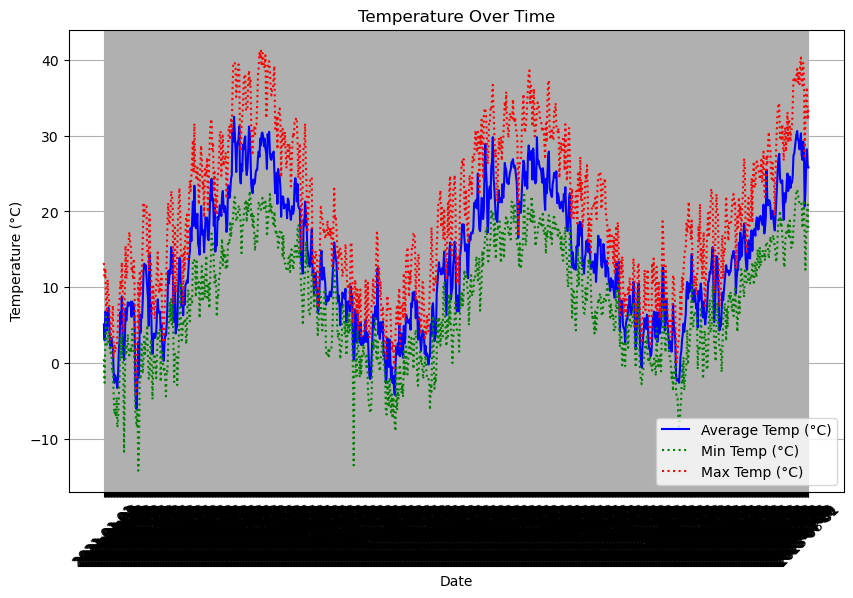

In [14]:
import matplotlib.pyplot as plt

# Line plot for average temperature
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['avg_temp_c'], label='Average Temp (°C)', color='blue')
plt.plot(data['date'], data['min_temp_c'], label='Min Temp (°C)', color='green', linestyle='dotted')
plt.plot(data['date'], data['max_temp_c'], label='Max Temp (°C)', color='red', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Remove the highly correlated features.

In [32]:
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Find highly correlated features
threshold = 0.9  # Set the correlation threshold
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify columns to drop
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the highly correlated features from the original dataset
data_cleaned = data.drop(columns=to_drop)

print("Dropped features due to high correlation:", to_drop)
print("Remaining features:", data_cleaned.columns)

Dropped features due to high correlation: ['min_temp_c', 'max_temp_c']
Remaining features: Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c',
       'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh',
       'avg_sea_level_pres_hpa'],
      dtype='object')


Encode the categorical features.

In [52]:
encoded_data = pd.get_dummies(data, columns=['city_name', 'season','date'], drop_first=True)

print(encoded_data.head())

   station_id  avg_temp_c  min_temp_c  max_temp_c  precipitation_mm  \
3       13588         6.6         6.1         7.2               3.6   
4       13588         4.3         2.3         6.7               4.6   
5       13588         6.2         2.6        11.0               0.0   
6       13588         7.3         4.1         9.3               0.5   
7       13588         5.7         4.2         8.1               7.9   

   avg_wind_dir_deg  avg_wind_speed_kmh  avg_sea_level_pres_hpa  \
3             298.0                 5.3                  1011.3   
4              11.0                 5.1                  1014.5   
5              18.0                 6.7                  1017.2   
6               0.0                 4.5                  1015.2   
7             346.0                 6.5                  1009.7   

   avg_temp_c_lag1  avg_temp_c_lag2  ...  date_2023-07-23  date_2023-07-24  \
3              6.8              3.0  ...            False            False   
4             

# Feauture Extraction
Select the relevant features for prediction and apply a lag of one, two, and three days to each chosen feature (except `season`), creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [36]:
relevant_features = ['avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm', 
                     'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']

# Apply lag of 1, 2, and 3 days to each feature
for feature in relevant_features:
    for lag in range(1, 4):  # Create lag for 1, 2, and 3 days
        data[f'{feature}_lag{lag}'] = data[feature].shift(lag)

# Drop rows with missing values resulting from the lag operation
data = data.dropna()

# View the updated dataset
print(data.head())

   station_id city_name        date  season  avg_temp_c  min_temp_c  \
3       13588    Skopje  2021-01-04  Winter         6.6         6.1   
4       13588    Skopje  2021-01-05  Winter         4.3         2.3   
5       13588    Skopje  2021-01-06  Winter         6.2         2.6   
6       13588    Skopje  2021-01-07  Winter         7.3         4.1   
7       13588    Skopje  2021-01-08  Winter         5.7         4.2   

   max_temp_c  precipitation_mm  avg_wind_dir_deg  avg_wind_speed_kmh  ...  \
3         7.2               3.6             298.0                 5.3  ...   
4         6.7               4.6              11.0                 5.1  ...   
5        11.0               0.0              18.0                 6.7  ...   
6         9.3               0.5               0.0                 4.5  ...   
7         8.1               7.9             346.0                 6.5  ...   

   precipitation_mm_lag3  avg_wind_dir_deg_lag1  avg_wind_dir_deg_lag2  \
3                    0.0      

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [54]:
# Define features (X) and target variable (y)
X = encoded_data.drop(columns=['avg_sea_level_pres_hpa'])  # Drop the target column from features
y = encoded_data['avg_sea_level_pres_hpa']  # Target column

# Calculate the index for the 80% split
split_index = int(0.8 * len(data))

# Manually split the dataset (do not shuffle)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (752, 970), X_test shape: (188, 970)
y_train shape: (752,), y_test shape: (188,)


## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest model
random_forest_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of each tree
    min_samples_split=2,  # Minimum samples required to split an internal node
    random_state=42     # For reproducibility
)

# Train the model using the training data
random_forest_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


Use the trained model to make predictions for the test set.

In [58]:
y_pred = random_forest_model.predict(X_test)

# Display the predictions
print("Predictions for the test set:")
print(y_pred)

Predictions for the test set:
[1024.41247134 1015.09849544 1014.19855707 1017.60793835 1024.02514659
 1018.20720036 1019.19384893 1019.39008532 1017.43195691 1024.63355177
 1019.36083811 1027.40529525 1030.77390476 1030.78141364 1030.14111097
 1030.93631097 1030.77542208 1030.40768095 1029.64942381 1030.69105541
 1029.04370022 1030.6237904  1030.45367374 1026.65869746 1024.10039986
 1017.83005893 1024.47516962 1018.16510049 1014.40572306 1014.92534923
 1014.77949633 1009.59216931 1006.17296919 1017.96555471 1023.32243834
 1016.60442057 1015.87349415 1015.08176209 1015.13180262 1015.20435235
 1014.92666437 1012.29588165 1015.25253657 1007.57948303 1008.19544815
 1008.56386813 1018.31070927 1023.47361538 1012.71150532 1009.65461452
 1019.32887326 1023.51660323 1019.19774311 1022.75473484 1018.92083085
 1014.27814104 1016.54207178 1015.49814626 1014.18631055 1014.16117319
 1011.18229011 1009.54790714 1020.44574495 1024.53751315 1022.02132371
 1012.47565139 1006.12856861 1014.90065568 1012

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [62]:
from sklearn.metrics import mean_squared_error, r2_score


decision_tree_r2 = r2_score(y_test, y_pred)


mean_squared_error(y_test, y_pred)

12.391972345342468

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.